# 1.) Load libraries/dataset

In [1]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import socket

from itertools import product
from os.path import isfile

from IPython.display import display_markdown

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

sns.set(style='ticks', color_codes=True)

# Load datasets
data_path_flows = './datasets/assignment10/TrafficLabelling_/'
data_path_ML = './datasets/assignment10/MachineLearningCVE/'

data_paths = {}
data_paths['Dataset 1'] = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data_paths['Dataset 2'] = 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
data_paths['Dataset 3'] = 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
data_paths['Dataset 4'] = 'Monday-WorkingHours.pcap_ISCX.csv'
data_paths['Dataset 5'] = 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
data_paths['Dataset 6'] = 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
data_paths['Dataset 7'] = 'Tuesday-WorkingHours.pcap_ISCX.csv'
data_paths['Dataset 8'] = 'Wednesday-workingHours.pcap_ISCX.csv'

# Functionalized in case I want to look at the other set of datasets
def load_datasets(parent_path=data_path_flows):
    datasets = data_paths.copy()
    for path in data_paths:
        datasets[path] = parent_path + data_paths[path]
        
    # Safety-Check path and Open/Convert to dataframes
    # Bulk loading probably isn't best practice.
    for dataset in datasets:
        if not isfile(datasets[dataset]):
            print(f"Dataset {dataset} not found. Please check that the dataset exists and the path is correct.")

        else:
            try: 
                datasets[dataset] = pd.read_csv(datasets[dataset], encoding='utf-8')
            except:
                datasets[dataset] = pd.read_csv(datasets[dataset], encoding='cp1252')
                
    # Trim Extra Whitespace from Column Names
    # I don't understand why pandas doesn't do this automagically
    for dataset in datasets:
        df = datasets[dataset]
        df.rename(columns=lambda col: col.strip(), inplace=True)

    return datasets
    
# Load the default dataset
datasets = load_datasets()

C:\Users\whm00\miniconda3\envs\AML\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (0,1,3,6,84) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
# Drop a few columns
# The one's ID'd in the warning above are useless to us (except 84 which is the label)
drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

for dataset in datasets:
    df = datasets[dataset]
    df.drop(columns=drop, inplace=True)
    
# This should leave us with a dataset that looks like the ML dataset with Protocol and Source Port added.

In [3]:
# Show our datasets
for dataset in datasets:
    display_markdown('### '+ dataset, raw=True)
    display(datasets[dataset])

### Dataset 1

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,54865,6,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,80,55054,6,109,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,80,55055,6,52,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,443,46236,6,34,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,443,54863,6,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,80,61374,6,61,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,80,61378,6,72,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,80,61375,6,75,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,80,61323,6,48,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Dataset 2

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,35396,22,6,1266342,41,44,2664,6954,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,60058,22,6,1319353,41,44,2664,6954,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,35396,22,6,160,1,1,0,0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,35398,22,6,1303488,41,42,2728,6634,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,22,35396,6,77,1,2,0,0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,41926,443,6,196135,49,57,1331,105841,570,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
286463,41934,443,6,378424,49,59,1325,104393,570,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
286464,41932,443,6,161800,70,103,1427,215903,570,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
286465,41930,443,6,142864,50,62,1331,110185,570,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Dataset 3

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,56108,3268,6,112740690,32,16,6448,1152.0,403,0,...,32,3.594286e+02,1.199802e+01,380.0,343.0,16100000.0,4.988048e+05,16400000.0,15400000.0,BENIGN
1,42144,389,6,112740560,32,16,6448,5056.0,403,0,...,32,3.202857e+02,1.574499e+01,330.0,285.0,16100000.0,4.987937e+05,16400000.0,15400000.0,BENIGN
2,0,0,0,113757377,545,0,0,0.0,0,0,...,0,9.361829e+06,7.324646e+06,18900000.0,19.0,12200000.0,6.935824e+06,20800000.0,5504997.0,BENIGN
3,63210,5355,17,100126,22,0,616,0.0,28,28,...,32,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,0,0,0,54760,4,0,0,0.0,0,0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,51018,53,17,61452,4,2,180,354.0,45,45,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
191029,49984,53,17,171,2,2,80,272.0,40,40,...,32,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
191030,64015,53,17,222,2,2,90,354.0,45,45,...,32,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
191031,123,123,17,16842,1,1,48,48.0,48,48,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


### Dataset 4

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,49188,6,4,2,0,12.0,0.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,80,49188,6,1,2,0,12.0,0.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,80,49188,6,1,2,0,12.0,0.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,49188,6,1,2,0,12.0,0.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,80,49486,6,3,2,0,12.0,0.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,3381,443,6,18738,1,1,6.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
529914,61587,53,17,60797,2,2,80.0,156.0,40.0,40.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
529915,51801,53,17,154,2,2,64.0,96.0,32.0,32.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
529916,57949,53,17,155,2,2,80.0,144.0,40.0,40.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Dataset 5

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,60148,22,6,166,1,1,0.0,0.0,0,0,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,22,60148,6,83,1,2,0.0,0.0,0,0,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,123,123,17,99947,1,1,48.0,48.0,48,48,...,40,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,123,123,17,37017,1,1,48.0,48.0,48,48,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,0,0,0,111161336,147,0,0.0,0.0,0,0,...,0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288597,34353,80,6,590930,2,0,0.0,0.0,0,0,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
288598,34353,80,6,1187988,2,0,0.0,0.0,0,0,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
288599,52024,80,6,10,1,9,6.0,54.0,6,6,...,20,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
288600,138,138,17,19,10,0,2370.0,0.0,237,237,...,20,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN


### Dataset 6

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,33898.0,389.0,6.0,113095465.0,48.0,24.0,9668.0,10012.0,403.0,0.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,33904.0,389.0,6.0,113473706.0,68.0,40.0,11364.0,12718.0,403.0,0.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,0.0,0.0,0.0,119945515.0,150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,59135.0,443.0,6.0,60261928.0,9.0,7.0,2330.0,4221.0,1093.0,0.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,59555.0,53.0,17.0,269.0,2.0,2.0,102.0,322.0,51.0,51.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset 7

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49182,88,6,640,7,4,440,358.0,220,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,49183,88,6,900,9,4,600,2944.0,300,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,49184,88,6,1205,7,4,2776,2830.0,1388,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,49185,88,6,511,7,4,452,370.0,226,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,49186,88,6,773,9,4,612,2944.0,306,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445904,51694,53,17,155,2,2,88,120.0,44,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
445905,443,59317,6,110,1,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
445906,62256,53,17,166,2,2,88,188.0,44,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
445907,443,54726,6,81,1,1,0,0.0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Dataset 8

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49459,80,6,38308,1,1,6,6.0,6,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,49453,389,6,479,11,5,172,326.0,79,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,46124,88,6,1095,10,6,3150,3150.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,49454,389,6,15206,17,12,3452,6660.0,1313,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,46126,88,6,1092,9,6,3150,3152.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,51114,53,17,32215,4,2,112,152.0,28,28,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692699,24054,53,17,324,2,2,84,362.0,42,42,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692700,443,58030,6,82,2,1,31,6.0,31,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692701,51694,53,17,1048635,6,2,192,256.0,32,32,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# 2). Explore a little

In [4]:
# Set 'Dataset 1' as the active dataframe
active_df = datasets['Dataset 1']

In [5]:
# Check for nulls
def check_for_nulls(dataset):
    df = datasets[dataset]
    
    display_markdown('### '+ dataset + ' nulls', raw=True)
    display(df.loc[:, df.isnull().any()].columns)
    
check_for_nulls('Dataset 1')

### Dataset 1 nulls

Index(['Flow Bytes/s'], dtype='object')

In [6]:
# How many nulls are there?
def check_null_count(data):
    df = pd.DataFrame()
    if type(data) is str:
        df = datasets[data]
    else:
        df = data
    num_nulls = df[df.isnull().any(axis=1)].shape[0]
    display_markdown(f"**{data if type(data) is str else 'Dataset'}** has {num_nulls} rows with nulls out of {df.shape[0]} rows. " +
                     f"({num_nulls / df.shape[0]:.5f}%)", raw=True)
     
check_null_count('Dataset 1')

**Dataset 1** has 4 rows with nulls out of 225745 rows. (0.00002%)

So we only have to worry about imputing on one column and that column is well represented in the data.

In [7]:
# Check our datatypes
def check_dtypes(data):
    if type(data) is str:
        display_markdown('### '+ dataset + ' dtypes', raw=True)
        display(datasets[dataset].dtypes.value_counts())
        
    else:
        display(df.dtypes.value_counts())
    
check_dtypes('Dataset 1')

### Dataset 8 dtypes

int64      43
float64    37
object      1
dtype: int64

And the only 'weird' datatype is the label (a string).

In [8]:
# Check label classes
# (This is where I originally discovered excess whitespace *sad Will noises*)
def check_feat_classes(dataset, feat):
    df = datasets[dataset]
    
    display(df[feat].unique())
    
check_feat_classes('Dataset 1', 'Label')

array(['BENIGN', 'DDoS'], dtype=object)

In [9]:
# Let's see all them feature names real quick.
def print_feature_names(dataset, per_line=4, datasets=datasets):
    df = datasets[dataset]
    outp = ''
    
    for i in range(0, df.shape[1], per_line):
        max_len = i+per_line if i+per_line < df.shape[1] else df.shape[1]
        
        for j in range(i, max_len):
            temp = '\"' + df.columns[j] + '\"'
            temp = f'{temp:30s}'
            
            outp += temp
            
        outp += '\n'
        
    outp = outp[:len(outp)-1]
    
    print(outp)
    
print_feature_names('Dataset 1')

"Source Port"                 "Destination Port"            "Protocol"                    "Flow Duration"               
"Total Fwd Packets"           "Total Backward Packets"      "Total Length of Fwd Packets" "Total Length of Bwd Packets" 
"Fwd Packet Length Max"       "Fwd Packet Length Min"       "Fwd Packet Length Mean"      "Fwd Packet Length Std"       
"Bwd Packet Length Max"       "Bwd Packet Length Min"       "Bwd Packet Length Mean"      "Bwd Packet Length Std"       
"Flow Bytes/s"                "Flow Packets/s"              "Flow IAT Mean"               "Flow IAT Std"                
"Flow IAT Max"                "Flow IAT Min"                "Fwd IAT Total"               "Fwd IAT Mean"                
"Fwd IAT Std"                 "Fwd IAT Max"                 "Fwd IAT Min"                 "Bwd IAT Total"               
"Bwd IAT Mean"                "Bwd IAT Std"                 "Bwd IAT Max"                 "Bwd IAT Min"                 
"Fwd PSH Flags"               "B

# 3.) Pick a machine learning methodology and justify your choice.

Here we will need to use a classifier model, as we are trying to classify our datapoints into "BENIGN" or malicious activity.
We will need to one-hot our Ports and our Protocols into multiple categories. In addition we should one-hot our 'Label' in a "one-vs-all" manner, as we are instructed in 4..

SVMs fail to converge even at 5000 iterations, and while we could increase this number that takes like 8 minutes to pop-out an error message, so 'no.'

# 4./5.) Finish processing dataset.

In [10]:
# Process labels assigning BENIGN to value 0 and the rest to value 1
def onehot_label(df):
    df['Label'] = df['Label'].apply(lambda label: 1 if label != 'BENIGN' else 0)
    return df

active_df = onehot_label(active_df)

# Check balance
active_df['Label'].value_counts()

1    128027
0     97718
Name: Label, dtype: int64

In [11]:
# Drop rows with Nulls (recorded as Infinite in csv).
# These make up less than a percent of the total of each table, so I don't think we will be missing much.
def drop_nulls(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
    null_index = df.loc[df.isnull().any(axis=1)].index
    df.drop(index=null_index, axis=1, inplace=True)
    
    df = df.reset_index()
    
    return df
    
active_df = drop_nulls(active_df)
display(active_df.loc[active_df.isna().any(axis=1)].index)

Int64Index([], dtype='int64')

In [12]:
# (OVERKILL)Common ports dictionary with reference to:
# https://www.stationx.net/common-ports-cheat-sheet/
# Our project here uses only 163/183 of these (-_- I was expecting less)
# Might be worth truncating to the most common of ports, but
# it sounds like the researchers were trying to make the dataset very diverse.
common_ports = {7:'Echo', 19:'Chargen', 20:'FTP', 21:'FTP', 22:'SSH/SCP',
                23:'Telnet', 25:'SMTP', 42:'WINS Replication', 43:'WHOIS',
                49:'TACACS', 53:'DNS', 67:'DHCP', 68:'DHCP', 69:'TFTP',
                70:'Gopher', 79:'Finger', 80:'HTTP', 88:'Kerberos', 
                102:'MS Exchange', 110:'POP3', 113:'Ident', 
                119:'NNTP (Usenet)', 123:'NTP', 135:'Microsoft RPC', 
                137:'NetBIOS', 138:'NetBIOS', 139:'NetBIOS', 143:'IMAP4',
                161:'SNMP', 162:'SNMP', 177:'XDMCP', 179:'BGP', 
                201:'AppleTalk', 264:'BGMP', 318:'TSP', 381:'HP Openview',
                382:'HP Openview', 383:'HP Openview', 389:'LDAP', 
                411:'DIRECT CONNECT', 412:'DIRECT CONNECT', 
                443:'HTTP OVER SSL', 445:'Microsoft DS', 464:'Kerberos',
                465:'SMTP OVER SSL', 497:'Retrospect', 500:'ISAKMP', 
                512:'rexec', 513:'rlogin', 514:'syslog', 515:'LPD/LPR',
                520:'RIP', 521:'RIP', 540:'UUCP', 554:'RTSP', 546:'DHCP',
                547:'DHCP', 560:'rmonitor', 563:'NNTP OVER SSL', 587:'SMTP',
                591:'FileMaker', 593:'Microsoft DCOM', 631:'Internet Printing',
                636:'LDAP OVER SSL', 639:'MSDP (PIM)', 646:'LDP (MPLS)',
                666:'DOOM', 691:'MS Exchange', 860:'iSCSI', 873:'rsync',
                902:'VMware Server', 989:'FTP', 990:'FTP', 993:'IMAP4', 
                995:'POP3', 1025:'Microsoft RPC', 
                1026:'Windows Messenger', 1027:'Windows Messenger', 1028:'Windows Messenger', 1029:'Windows Messenger',
                1080:'SOCKS PROXY', 1194:'OpenVPN', 1214:'KAZAA',
                1241:'Nessus', 1311:'Dell OpenManage', 1337:'WASTE', 1433:'Microsoft SQL',
                1434:'Microsoft SQL', 1512:'WINS', 1589:'Cisco VQP', 1701:'L2TP',
                1723:'MS PPTP', 1725:'STEAM', 1741:'CiscoWorks 2000',
                1755:'MS MEDIA SERVER', 1812:'RADIUS', 1813:'RADIUS',
                1863:'MSN', 1985:'Cisco HSRP', 2000:'Cisco SCCP', 2002:'Cisco ACS',
                2049:'NFS', 2082:'cPanel', 2083:'cPanel', 2100:'Oracle XDB',
                2222:'DirectAdmin', 2302:'HALO', 2483:'Oracle DB', 2484:'Oracle DB',
                2745:'BAGLE.H', 2967:'Symantec AV', 3050:'Interbase DB', 
                3074:'XBOX LIVE', 3124:'HTTP Proxy', 3128:'HTTP Proxy', 
                3222:'GLBP', 3260:'iSCSI Target', 3306:'MySQL', 
                3389:'Terminal Ser ver', 3689:'iTunes', 3690:'Subversion',
                3724:'World Of Warcraft', 3784:'Ventrilo', 3785:'Ventrilo',
                4333:'mSQL', 4444:'BLASTER', 4664:'Google Desktop', 
                4672:'EMULE', 4899:'Radmin', 5000:'UPnP', 5001:'Slingbox',
                5001:'iperf', 5004:'RTP', 5005:'RTP', 5050:'YAHOO! MESSENGER',
                5060:'SIP', 5190:'AIM/ICQ', 5222:'XMPP/Jabber', 
                5223:'XMPP/Jabber', 5432:'PostgreSQL', 5500:'VNC Ser ver',
                5554:'SASSER', 5631:'pcAnywhere', 5632:'pcAnywhere',
                5800:'VNC', 6000:'X11', 6001:'X11', 6112:'BATTLE.NET',
                6129:'DameWare', 6257:'WINMX', 6346:'GNUTELLA', 
                6347:'GNUTELLA', 6500:'GAMESPY ARCADE', 6566:'SANE',
                6588:'AnalogX', 6665:'IRC', 6669:'IRC', 6679:'IRC', 6697:'IRC',
                8000:'Internet Radio', 8080:'HTTP Proxy', 8086:'Kaspersky AV',
                8087:'Kaspersky AV', 8118:'Privoxy', 8200:'VMware Server',
                8500:'Adobe ColdFusion', 8767:'TEAMSPEAK', 8866:'BAGLE.B',
                9100:'HP JetDirect', 9119:'MXIT', 9800:'WebDAV', 
                9898:'DABBER', 9988:'RBOT/SPYBOT', 9999:'Urchin', 
                10000:'Webmin', 10000:'BackupExec', 10113:'NetIQ',
                10114:'NetIQ', 10115:'NetIQ', 10116:'NetIQ', 11371:'OpenPGP',
                12345:'NETBUS', 13720:'NetBackup', 13721:'NetBackup', 19226:'AdminSecure',
                19638:'Ensim', 20000:'Usermin', 24800:'Synergy'}
port_counts = {}
print(len(common_ports))

# port lookup function
def port_lookup(port : int, port_list=common_ports):    
    port_name = 'other'
    if port in common_ports:
        if port in port_counts:
            port_counts[port] += 1
        else:
            port_counts[port] = 1
        port_name = common_ports[port]
    
    return port_name

# Process the ports and protocols into names
# Translate port numbers to named services
def translate_ports(df, port_feats=['Source Port', 'Destination Port']):
        
    for pf in port_feats:
        df[pf] = df[pf].apply(port_lookup)
        
    return df

# Translate Protocols
def translate_protocols(df):
    # Create an abriged protocol lookup table
    # https://stackoverflow.com/questions/37004965/how-to-turn-protocol-number-to-name-with-python
    protocols = {num:name[8:] for name,num in vars(socket).items() if name.startswith("IPPROTO")}
    
    df['Protocol'] = df['Protocol'].apply(lambda x: protocols[x])
    
    return df

186


In [13]:
%%time
active_df = translate_ports(active_df)

Wall time: 171 ms


In [14]:
%%time
active_df = translate_protocols(active_df)

Wall time: 49 ms


In [15]:
# Taken from module 3 notebook
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

# We're going to hold off on applying the onehot encoding until after showing the histograms for part 6.
# active_df = encode_onehot(active_df, 'Destination Port')
# active_df = encode_onehot(active_df, 'Source Port')

In [16]:
active_df

,index,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,HTTP OVER SSL,other,TCP,3,2,0,12,0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,HTTP,other,TCP,109,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,2,HTTP,other,TCP,52,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,3,HTTP OVER SSL,other,TCP,34,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,4,HTTP OVER SSL,other,TCP,3,2,0,12,0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225706,225740,HTTP,other,TCP,61,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225707,225741,HTTP,other,TCP,72,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225708,225742,HTTP,other,TCP,75,1,1,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225709,225743,HTTP,other,TCP,48,2,0,12,0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


# 6.) Histograms

### Fwd/Bwd Packet Histograms

The range on packets is huge, but mostly on the smaller side so I had to be a little creative.

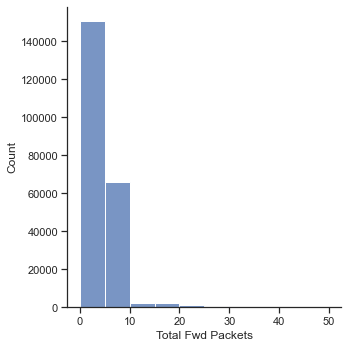

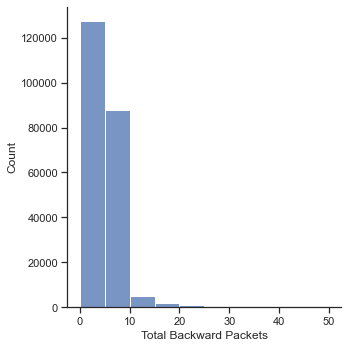

In [17]:
sns.displot(active_df['Total Fwd Packets'], binwidth=5, binrange=[0, 50])
sns.displot(active_df['Total Backward Packets'], binwidth=5, binrange=[0, 50])

### Named port histograms

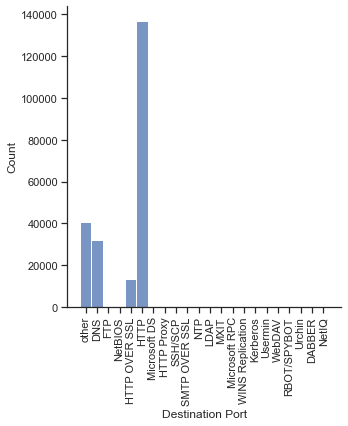

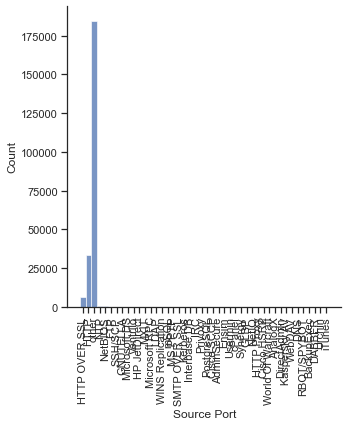

In [18]:
dp = sns.displot(active_df['Destination Port'])
dp.set_xticklabels(rotation=90)

sp = sns.displot(active_df['Source Port'])
sp.set_xticklabels(rotation=90)

### Protocol Histogram

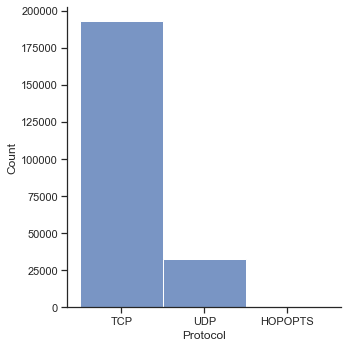

In [19]:
sns.displot(active_df['Protocol'])

### Flow Duration histogram

Some appear to be rediculously long.

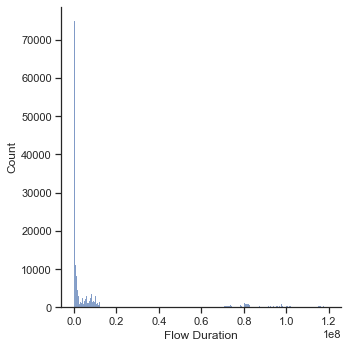

In [20]:
sns.displot(active_df['Flow Duration'])

# 7. Attempt a few classifier models and report their 10-fold CV performance.

In [21]:
# Apply onehot-encoding to Ports/Protocols
active_df = encode_onehot(active_df, 'Destination Port')
active_df = encode_onehot(active_df, 'Source Port')
active_df = encode_onehot(active_df, 'Protocol')

# Update the datasets dictionary for the changes made to the active_df
datasets['Dataset 1'] = active_df

assert(active_df is datasets['Dataset 1'])

**The next cell can take a little while**

About 6 minutes on my machine.

In [22]:
%%time
# Define models  
models = [DecisionTreeClassifier(),
          RandomForestClassifier(n_jobs=4),
          KNeighborsClassifier(n_jobs=4),
          BernoulliNB(),
          AdaBoostClassifier()] # I adopted a kitten named 'Ada,' so AdaBoost is a must!

# Define test-func
def test_models(df, models=models, model_names=None):
    kfold = KFold(n_splits = 10)

    X = df.loc[:, df.columns != 'Label'].values
    Y = df.loc[:, df.columns == 'Label'].values.ravel()
    
    if model_names is not None:
        assert(len(model_names) == len(models))
    
    # Train and Test
    for idx, model in enumerate(models):
        scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy', n_jobs=4)
        print(f'Model: {model if model_names is None else names[idx]}')
        print(f'Scores: {scores}\n')

test_models(datasets['Dataset 1']) # Explicit as possible 

Model: DecisionTreeClassifier()
Scores: [0.97102605 0.99986709 1.         0.99991139 0.99955695 0.9999557
 0.9999557  1.         0.94018874 0.99596828]

Model: RandomForestClassifier(n_jobs=4)
Scores: [0.99973418 1.         0.9999557  0.9999557  0.99982278 0.9999557
 0.9999557  0.99991139 0.99796199 0.99645563]

Model: KNeighborsClassifier(n_jobs=4)
Scores: [0.96043771 0.99401887 0.99663285 0.99734172 0.99574675 0.99415179
 0.99450622 0.99357583 0.98887954 0.98670861]

Model: BernoulliNB()
Scores: [0.92357788 0.9856896  0.99034159 0.99096185 0.99384166 0.99127199
 0.98533516 0.98675291 0.96668291 0.8834345 ]

Model: AdaBoostClassifier()
Scores: [0.99960128 0.99991139 0.9999557  1.         0.99986709 1.
 0.99986709 0.99991139 0.88578264 0.99991139]

Wall time: 5min 50s


# 8.) Convert your code to be used for the remaining 7 datasets.

I functionalized everything as I went along, so the converting is unnecessary.

Let's apply all the functions.

In [23]:
# Function for applying all database fixes/changes
def apply_all(df):
    # One vs all onehot of label
    df = onehot_label(df)
    
    # Drop rows with nulls
    df = drop_nulls(df)
    
    # Translate our port numbers to names
    df = translate_ports(df)
    
    # Translate our protocols to names
    df = translate_protocols(df)
    
    # One-hot ports and protocols
    df = encode_onehot(df, 'Destination Port')
    df = encode_onehot(df, 'Source Port')
    df = encode_onehot(df, 'Protocol')
    
    return df

In [24]:
%%time
# Use apply_all() on all remaining datasets
for i in range(2, len(datasets)+1):
    # make the dataset name
    ds_name = f'Dataset {i}'
    
    # get the dataframe
    df = datasets[ds_name]
    
    # apply the changes
    df = apply_all(df)
    
    # record changes
    datasets[ds_name] = df

Wall time: 30.5 s


# 9.) Pick a classifier and report it's evaluation for the remaining 7 datasets.

I'm going to use a Decision Tree classifier because it was getting very good accuracy on 'Dataset 1' (not that any of them did poorly; except LinearSVC when I tried it).

As can be seen below it works well with the other as well.

Datasets 3, 4, and 7 have some weirdly accurate results, but this appears to be easily explained.

* Dataset 3 is 'Friday-WorkingHours-Morning.' It features attacks from an ARES Botnet, but this Botnet appears to have mostly (almost entirely) attempted connections to port 8080. 8080 is named as 'HTTP Proxy' in our common_ports dictionary and is the only port that is named that, which would make it fairly trivial to determine which connections were malicious.

* Dataset 4 is 'Monday-WorkingHours,' which features no attacks (all activity is 'BENIGN' according to the CIC website).

* Dataset 7 is 'Tuesday-WorkingHours,' which features brute-force attacks on SSH and FTP ports. Just like with Dataset 3 these are both named ports and there is very little variation in the port attacked, which probaly makes this pretty trivial.

Datasets 3 and 7 could be made more difficult by varying the port attacked and/or by mixing (more) attack methods into the data.

In [25]:
model = [DecisionTreeClassifier()]

for i in range(2, len(datasets)+1):
    # make the dataset name
    ds_name = f'Dataset {i}'
    
    # get the dataframe
    df = datasets[ds_name]
    
    print(f'Dataset: {ds_name}')
    test_models(df, models=model)

Dataset: Dataset 2
Model: DecisionTreeClassifier()
Scores: [0.99975533 0.99972038 0.99993009 0.99989514 1.         1.
 0.99996505 0.99996505 0.99902129 0.99979028]

Dataset: Dataset 3
Model: DecisionTreeClassifier()
Scores: [1.         1.         1.         1.         1.         0.99989524
 1.         1.         1.         1.        ]

Dataset: Dataset 4
Model: DecisionTreeClassifier()
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Dataset: Dataset 5
Model: DecisionTreeClassifier()
Scores: [0.99993065 0.99996533 0.99954924 0.99937587 0.99982663 0.99996532
 0.99996532 0.99989597 0.99996532 0.99996532]

Dataset: Dataset 6
Model: DecisionTreeClassifier()
Scores: [0.99964756 0.99988251 0.99994126 0.99982377 0.99864889 0.99911884
 0.99970628 0.99988251 0.99994126 0.99988251]

Dataset: Dataset 7
Model: DecisionTreeClassifier()
Scores: [0.99964097 0.99975317 0.99997756 0.99950634 1.         1.
 1.         1.         1.         0.99995512]

Dataset: Dataset 8
Model: DecisionTreeClassifier()
Scores: 

# 10.) Briefly write up your thoughts about developing a machine learning model where you are not a subject matter expert.

I have a computer engineering degree and work as an IT technician, so the subject matter here isn't exactly outside my wheelhouse (I'm familiar with the attack vectors and am pretty comfortable with computer networking).

That being said, I think the biggest challenge (even in ML in general) might be knowing what to abstract. I imagine that if you approached this problem without knowing to translate the names of the ports it might be a lot harder to do this particular exercise (Datasets 3 and 7 would probably still be trivial).

Another problem might be in detecting anomalous data. In this exercise, all I did was remove the datasets that reported a duration of 0 (which resulted in 'Infinity' for features derived by division by the duration), but I imagine in other datasets it  might a lot of work to figure out anamolous data. Admittedly, there might be additional anomalous datapoints in this dataset (esp. where I didn't set an upper limit on the values of features), but that doesn't appear to have effected our results too harshly if so.